
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression Code Assignement

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_1/Session_1_Linear_Regression_exercise_NOTSOLVED.ipynb)


An Ecommerce company sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They need our help to figure it out! 

**When working on the assignment there could be multiple models to explore data or iplement specific analysis. Choose that you retain more appropriate but always justify every choice you make (e.g., why you choose some variables), comment your code, describe the plots and results you obtain.**

Feel free to add many cells as you need to write your code, comments, answers, etc.



### Import libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

#### Code to avoid cell auto-scrolling

In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

#### Read the dataset provided by the company: 
They provide us with a csv file `Ecommerce_Customers.csv`

The dataset contains information about the customers:
    - Email: email of the customer.
    - Address: address of the customer.
    - Avatar: color of the avatar.
    - Avg. Session Length: Average session of in-store style advice sessions.
    - Time on App: Average time spent on App in minutes
    - Time on Website: Average time spent on Website in minutes
    - Length of Membership: How many years the customer has been a member.

In [ ]:
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_1/Ecommerce_Customers.csv','Ecommerce_Customers.csv')

('Ecommerce_Customers.csv', <http.client.HTTPMessage at 0x7f2284e56668>)

In [ ]:
customers = pd.read_csv('Ecommerce_Customers.csv')
customers.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [ ]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploatory Data analysis

Perform some exploratory data analysis:
    - Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, remove thos variables.
    - Check for missing values
    - check the distribution of the target variable to see if there is some outlier
    - check which are the variables with highest correlation with the target variable
    - check for multi-colinearity

**Manual feature engineering. Is there any variable that do not make sense to take into account for your analysis? If yes, explain why you think they are useless and remove them.**



Write your answer here:






In [ ]:
#PUT YOUR CODE HERE
customers.drop(['Email','Address','Avatar'], axis=1, inplace=True)
customers.head()
#We removed this columns because, by logic, they dont tell us anything about the yearly amount spent. 

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


#### Check Missing values

In [ ]:
#PUT YOUR CODE HERE
#customers.info()
customers.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

#### Check disttribution of the target variable

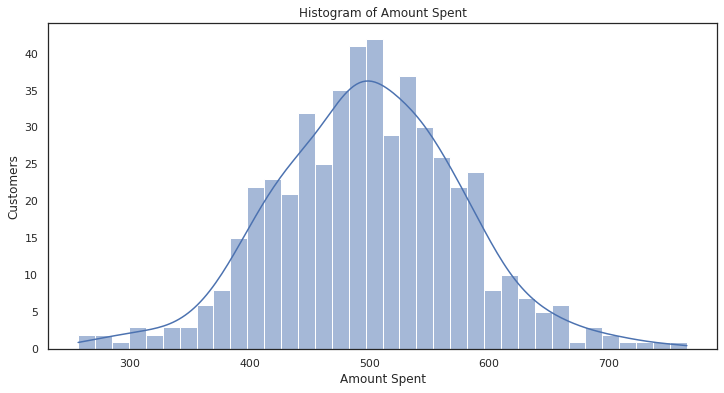

In [ ]:
#PUT YOUR CODE HERE
sns.set_theme(style="white")
plt.figure(figsize=(12,6))
#sns.set_theme()
sns.histplot(customers['Yearly Amount Spent'], kde=True, 
             bins=int(180/5))

# Add labels
plt.title('Histogram of Amount Spent')
plt.xlabel('Amount Spent')
plt.ylabel('Customers')
plt.show()

#### Check correlation among variables

Explore the relation between each indipendent variable and the dipendent variable using multiple plots, among them also **jointplot** plots. 
    

<Figure size 720x360 with 0 Axes>

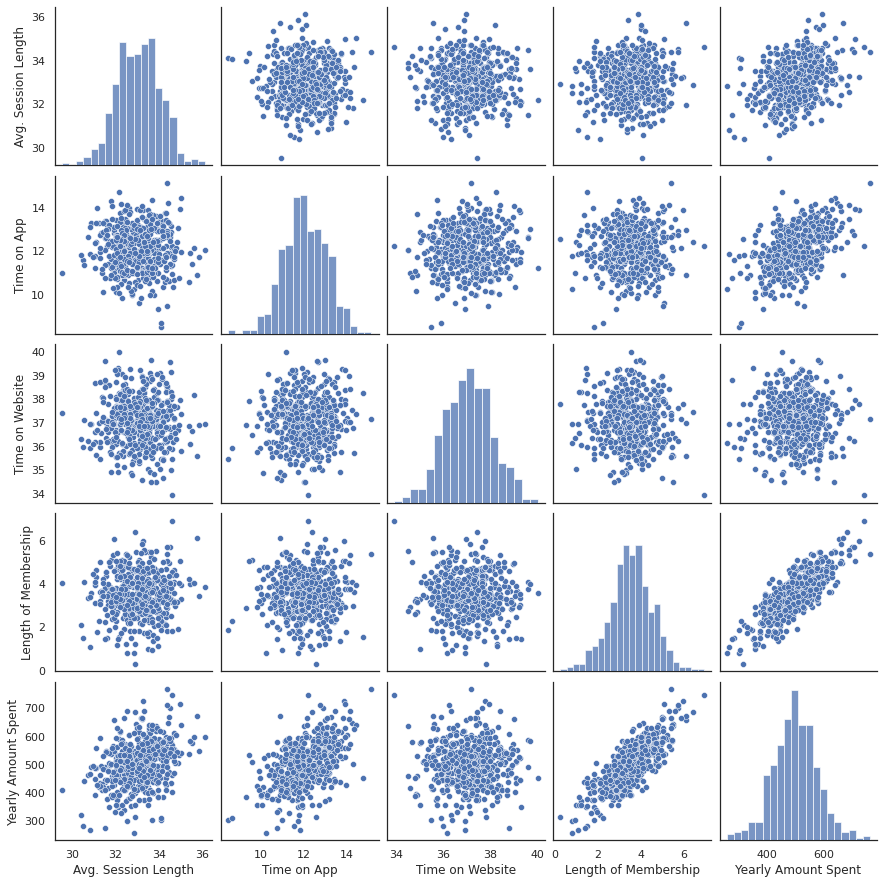

In [ ]:
#PUT YOUR CODE HERE
plt.figure(figsize=(10,5))
sns.pairplot(customers)
## Add further cells in case you need

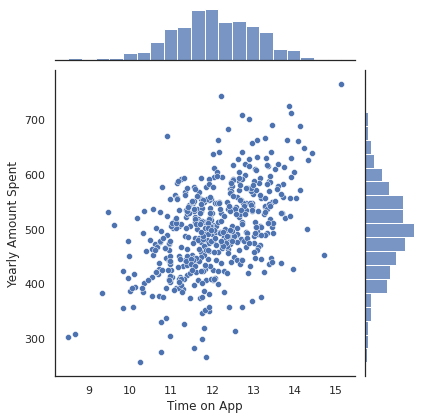

In [ ]:
sns.jointplot(data=customers, x="Time on App", y="Yearly Amount Spent")

In [ ]:
customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

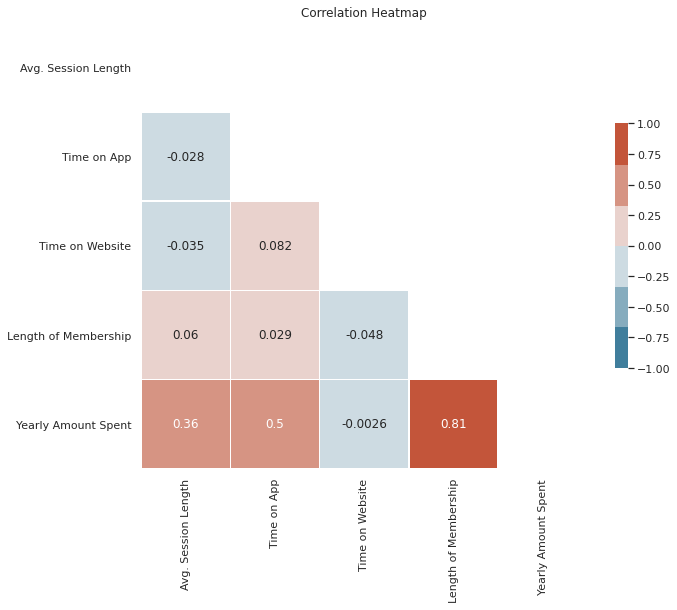

In [ ]:
sns.set_theme(style="white")
corr1=customers.corr()
mask = np.triu(np.ones_like(corr1, dtype=bool))
f, ax = plt.subplots(figsize=(10, 9))
cmap = sns.diverging_palette(230, 20)
heatmap=sns.heatmap(corr1, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.set_title('Correlation Heatmap')

## Predictive model

Now that we have explored a bit the data we want to create a predictive model to understand if 
the company should focus more on their mobile app experience or on their website.

Or maybe there is some other apsect that is still more important and and the company should focus on it!!

Let's implement a simple linear regression model (choose the variable you reatin more appropriate and explain why you chose it) and a multivariate model that uses multiple variables. 

Then, based on your preliminary exploratoy data analysis and on the models' results draw your conclusion.

### Simple linear regression

In [ ]:
# Prepare data for training
X = customers[['Time on App']]
Y = customers[['Yearly Amount Spent']]
#They should focuss more on the App, because, as we can see on the correlation heatmap, 
#the time the user spents on the website contributes in a negative way to the yearly sales. 
#The feature that contributes the most is the length of the membership, this could also be another aspect the company could be focused on.  

### Training and test splits
Split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [ ]:
#PUT YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(375, 1)
(125, 1)
(375, 1)
(125, 1)


### Training of the model

In [ ]:
#PUT YOUR CODE HERE
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
lin_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [ ]:
#PUT YOUR CODE HERE
print(lin_model.coef_)
print(lin_model.intercept_)

[[40.82223137]]
[6.00902224]


### Make a plot to show how the model fit the training data.

Looking at the plot explain if the coefficients you found make sense

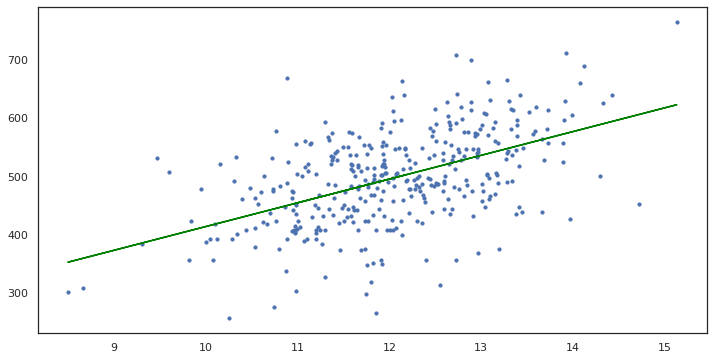

In [ ]:
#PUT YOUR CODE HERE
plt.figure(figsize=(12,6))
plt.scatter(X_train, Y_train, s=10)
plt.plot(X_train, lin_model.predict(X_train), color = "green")
plt.show()

In [ ]:
Y_train_pred = lin_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
r2_train = r2_score(Y_train, Y_train_pred)
print('RMSE of trainin set is: ', rmse_train)
print("R2 score of training set is: ", r2_train)

RMSE of trainin set is:  69.14896485519206
R2 score of training set is:  0.26377184625079364


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [ ]:
Y_test_pred = lin_model.predict(X_test)

#### Evalution Metrics

In [ ]:
#PUT YOUR CODE HERE
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_test = r2_score(Y_test, Y_test_pred)
print('RMSE of trainin set is: ', rmse_test)
print("R2 score of training set is: ", r2_test)

RMSE of trainin set is:  67.21201381124037
R2 score of training set is:  0.19460615741124732


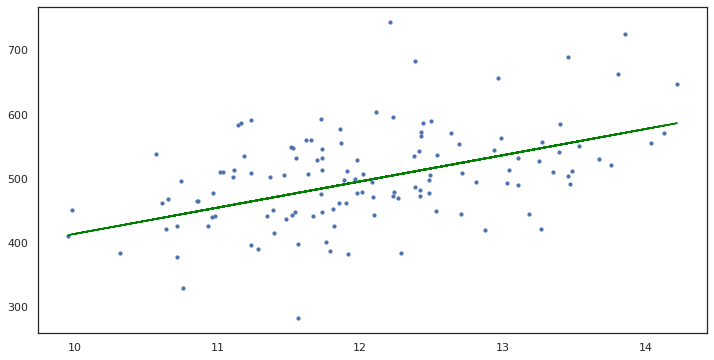

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(X_test, Y_test, s=10)
plt.plot(X_test, Y_test_pred, color = "green")
plt.show()

## Multivariate Model

In [ ]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
# Prepare data for training
#PUT YOUR CODE HERE

X = customers[['Time on App','Avg. Session Length','Length of Membership']]
Y = customers[['Yearly Amount Spent']]


### Training and test splits
Next, we split the data into training and testing sets. We train the model with 75% of the samples and test with the remaining 25%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set random_state=5**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.60728003,  1.45635117,  0.55010651],
       [-0.94946372, -1.13650215, -0.87092735],
       [-0.72713923, -0.05272322,  0.5720669 ],
       ...,
       [-0.55685385, -0.40987204,  1.42726105],
       [ 0.34124841,  0.27159708, -1.19904197],
       [ 0.36882066,  0.66842216, -0.79967926]])

In [ ]:
#PUT YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(375, 3)
(125, 3)
(375, 1)
(125, 1)


### Training of the model

In [ ]:
#PUT YOUR CODE HERE
lin_model_mult = LinearRegression()
lin_model_mult.fit(X_train, Y_train)
lin_model_mult

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Print the coeficients of the model

In [ ]:
#PUT YOUR CODE HERE
print(lin_model_mult.coef_)
print(lin_model_mult.intercept_)

[[38.27246743 25.66560845 61.68646669]]
[499.47041904]


### Evaluate the model on the test set

    - Make some plots you think maybe usefull to evaluate the predictions of our model and then evaluate it through some metrics.

In [ ]:
#PUT YOUR CODE HERE
Y_test_pred = lin_model_mult.predict(X_test)

#### Evalution Metrics

In [ ]:
mae_test = mean_absolute_error(Y_test, Y_test_pred)
mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
r2_test = r2_score(Y_test, Y_test_pred)

print('Mean absolute error of trainin set is: ', mae_test)
print('MSE of trainin set is: ', mse_test)
print('RMSE of trainin set is: ', rmse_test)
print("R2 score of training set is: ", r2_test)

Mean absolute error of trainin set is:  7.382879447475426
MSE of trainin set is:  92.76139447289226
RMSE of trainin set is:  9.631271695518317
R2 score of training set is:  0.9834620468301944


#### Which model has better performance?

Write your answer here:






**Describe how you interpret the coefficients of the model and based on that decide how the company shoud behave in order to try to improve their business increasing the `Yearly Amount Spent` per customen.**

In [ ]:
#Time on app, Avg Session Time, Length of membership
print(lin_model_mult.coef_)
#X = customers[['Time on App','Avg. Session Length','Length of Membership']]

[[38.27246743 25.66560845 61.68646669]]


Coefficients Interpretation

The Length of Membership is the feature that impacts more the Sales, with all other variables held constant, if the length of membership increase by 1, Sales will increase by 61.68

With all other variables held constant, if the time on app increase by 1, sales will increase by 38.27

With all other variables held constant, if the avg. session length increase by 1, sales will increase by 25.66

Write your answer here:








The company should focuss on the App since the web page doesn't contribute positively to the Sales. 

Before investing in the app, the company should invest on developing a strategy to mantain their actual members and increase their loyalty. This because what impact sales the most is the Length of membership, meaning that loyal customers are the ones who buy more.  

Later on, the company can invest on the app. Doing something to increase the amount of time that the user spents. For example, providing a section of recommended items based on searches that he/she has made. 

##Ignore this section

In [ ]:
def cost_function(X, Y, B):
 m = len(Y)
 J = np.sum((X.dot(B) - Y.iloc[:,-1]) ** 2)/(2 * m)
 return J

In [ ]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
  for iteration in range(iterations):
    #print(iteration)
    # Hypothesis Values
    h = X.dot(B)
    #print(h)
    # Difference b/w Hypothesis and Actual Y
    loss = h - Y.iloc[:,-1]
    #print(loss)
    # Gradient Calculation
    gradient = X.T.dot(loss) / m
    #print(gradient)
    # Changing Values of B using Gradient
    B = B - alpha * gradient
    #print(B)
    # New Cost Value
    cost = cost_function(X, Y, B)
    #print(cost)
    cost_history[iteration] = cost

  return B, cost_history

In [ ]:
B = np.zeros(X_train.shape[1])#3
h = X_train.dot([0,0,0])
h

In [ ]:
B = np.zeros(X_train.shape[1])#3
h = X_train.dot([0,0,0])
loss = h - Y_train.iloc[:,-1]
#print(loss)
gradient = X_train.T.dot(loss) / 375
B = B - .003 * gradient
B
m = len(Y_train)
#J = np.sum((X_train.dot(B) - Y) ** 2)/(2 * m)
np.sum(X_train.dot(B) - Y_train.iloc[:,-1] ** 2)/ (2*m)

-126325.12326101772

In [ ]:
B = np.zeros(X_train.shape[1])#3
alpha = .003#learnig rate, most commonly used are: .001, .003, .01, .03, .1, .3
iter_ = 2000
#batch_gradient_descent(X_train, Y_train, B, alpha, iter_)
newB, cost_history = batch_gradient_descent(X_train, Y_train, B, alpha, iter_)

In [ ]:
newB
#cost_history

array([38.99970774, 25.57250083, 61.22381534])

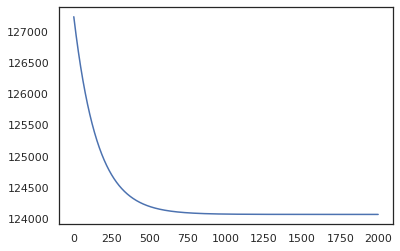

In [ ]:
plt.plot(cost_history)